# Bilddaten

Digitale Bilder bestehen aus drei Farbwerten (rot, grün, blau) pro Pixel, d.h. Bildelement. Aus diesen drei Werten wird bei der Darstellung die gewünschte Farbe zusammengestellt. Der Wertebereich ist dabei entweder zwischen 0 und 255 (8-bit) oder als Gleitkommazahl zwischen 0 und 1.   

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Im weiteren wird <a href="./campus_haspel.jpeg" download>ein Bild vom Campus Haspel</a> zur Demonstration verwendet.

In [2]:
data = plt.imread('./campus_haspel.jpeg')

In [3]:
print( data )
print( data.shape )

[[[ 52  41  45]
  [ 46  35  39]
  [ 42  33  34]
  ...
  [ 58  46  32]
  [ 54  37  19]
  [ 52  32   8]]

 [[ 46  37  38]
  [ 43  34  35]
  [ 43  34  35]
  ...
  [ 58  46  34]
  [ 59  43  27]
  [ 52  34  14]]

 [[ 37  33  30]
  [ 38  34  31]
  [ 40  37  32]
  ...
  [ 50  40  28]
  [ 53  39  26]
  [ 55  42  26]]

 ...

 [[128 105  91]
  [123 104  89]
  [121 105  89]
  ...
  [  9  14  10]
  [  5  14   9]
  [  8  21  14]]

 [[134  94  86]
  [126  94  83]
  [113  94  79]
  ...
  [ 12  14  11]
  [  4  13   8]
  [  4  17   8]]

 [[138  93  88]
  [133  99  90]
  [120 101  87]
  ...
  [ 12  14  11]
  [  5  15   7]
  [  3  16   7]]]
(3024, 4032, 3)


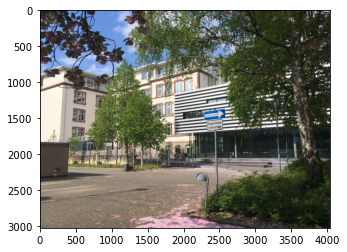

In [4]:
plt.imshow( data );

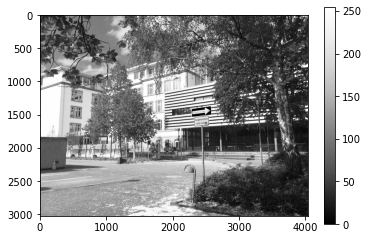

In [5]:
plt.imshow( data[:,:,0], cmap='Greys_r' )
plt.colorbar();

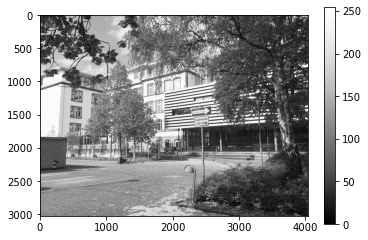

In [6]:
plt.imshow( data[:,:,1], cmap='Greys_r' )
plt.colorbar();

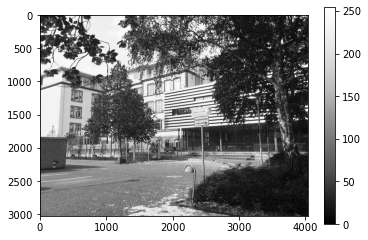

In [7]:
plt.imshow( data[:,:,2], cmap='Greys_r' )
plt.colorbar();

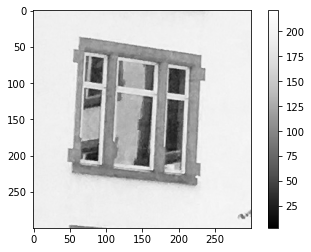

In [21]:
bereich = np.array(data[1320:1620, 400:700, 0], dtype=float)
plt.imshow( bereich, cmap="Greys_r" )
plt.colorbar()

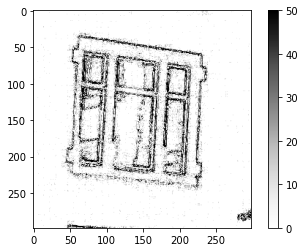

In [9]:
lapx = bereich[2:, :] - 2*bereich[1:-1, :] + bereich[:-2, :]
lapy = bereich[:, 2:] - 2*bereich[:, 1:-1] + bereich[:, :-2]
lap = np.abs(lapx[:,1:-1] + lapy[1:-1, :])
lap[lap > 50] = 50
lap[lap < 10] = 0

plt.imshow(lap, cmap='Greys')
plt.colorbar();
# plt.plot(lap[100, :])

In [39]:
def img_lap(data, schwellwert=25):
    bereich = np.array(data, dtype=float)
    lapx = bereich[2:, :] - 2*bereich[1:-1, :] + bereich[:-2, :]
    lapy = bereich[:, 2:] - 2*bereich[:, 1:-1] + bereich[:, :-2]
    lap = np.abs(lapx[:,1:-1] + lapy[1:-1, :])
    lap[lap > schwellwert] = 255
    lap[lap < schwellwert] = 0
    return lap

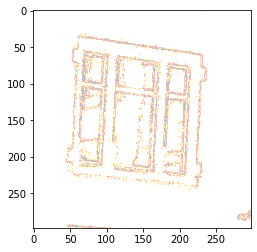

In [43]:
lap = img_lap(data[1320:1620, 400:700, 0], schwellwert=25)
plt.imshow(lap, cmap="hot_r", alpha=0.25);

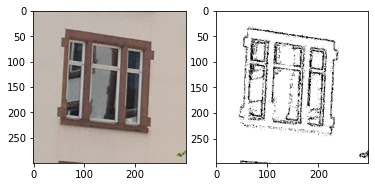

In [49]:
ax = plt.subplot(1, 2, 1)
ax.imshow(data[1320:1620, 400:700])

ax = plt.subplot(1, 2, 2)
ax.imshow(lap, cmap="Greys");